In [28]:
# Importacoes
import time
import multiprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
from algoritmos import insertionSort, selectionSort, mergeSort, heapSort
from utils import printList

In [29]:
instancias = [20000, 10000, 5000, 2000, 1000]
# instancias = [2000000, 1000000, 500000, 250000, 125000]
# algoritmos = [insertionSort]
algoritmos = [insertionSort, selectionSort, mergeSort, heapSort]
# distribuicoes = ['C'] # Crescente, Decrescente, Aleatório, 50% ordenado (respectivamente)
distribuicoes = ['C', 'D', 'A', 'M'] # Crescente, Decrescente, Aleatório, 50% ordenado (respectivamente)

# Cria as distribuições
# crescente = np.arange(inst)
# decrescente = crescente[::-1]
# aleatorio = random.randint(inst, size=(inst))
# meioOrdenado = crescente[:int(inst/2)]
# meioAleatorio = random.randint(int(inst/2), size=(int(inst/2)))
# meio = np.concatenate((meioOrdenado, meioAleatorio)) # 50% ordenado

In [30]:
# Inicializa o array de dados
dados = {'algoritmo': [], 'instancia': [], 'distribuicao': [], 'tempo_execucao_s': [], 'tempo_execucao_ms': []}

# Define o tempo de timeout (em minutos)
timeout = 20

# Percorre a lista de algoritmos
for algo in algoritmos:
    # Percorre a lista de instancias
    for inst in instancias:
        # Percorre a lista de distribuições
        for distrib in distribuicoes:
            if distrib == 'C': # Crescente
                dist = np.arange(inst)
            if distrib == 'D': # Decrescente
                dist = np.arange(inst)[::-1]
            if distrib == 'A': # Aleatório
                dist = random.randint(inst, size=(inst))
            if distrib == 'M': # 50% Ordenado
                meioOrdenado = np.arange(inst)[:int(inst/2)]
                meioAleatorio = random.randint(int(inst/2), size=(int(inst/2)))
                dist = np.concatenate((meioOrdenado, meioAleatorio))
                
            print(algo.__name__, inst, distrib)
            dados['algoritmo'].append(algo.__name__) 
            dados['instancia'].append(inst)
            dados['distribuicao'].append(distrib)
        
            # Inicia o "relógio" (cálculo do tempo de execução)
            start_time = time.time()
                    
            # Cria uma thread para execução do algoritmo
            p = multiprocessing.Process(target=algo, name=algo.__name__, args=(dist,))
            p.start()
            
            # Roda a thread com o timeout definido anteriormente
            p.join(timeout * 60)
            
            # Finaliza o "relógio" e salva os dados em uma tabela
            end_time = time.time()
            tempo_execucao = end_time - start_time
            dados['tempo_execucao_s'].append(round(tempo_execucao,2))
            dados['tempo_execucao_ms'].append(round(tempo_execucao*1000,2))
            
            # Salva o resultado em uma tabela "tempos_execucacao.csv"
            df = pd.DataFrame(dados)
            df.head()

            df.to_csv('tempos_execucao.csv')
            print('Dados Salvos!')

insertionSort 20000 C
Dados Salvos!
insertionSort 20000 D
Dados Salvos!
insertionSort 20000 A


KeyboardInterrupt: 

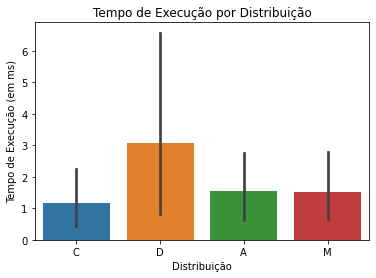

In [33]:
# Cria os gráficos

df=pd.read_csv('tempo_execucao.csv')

sns.barplot(data=df, y='tempo_execucao_ms', x='distribuicao')
plt.title('Tempo de Execução por Distribuição')
plt.xlabel('Distribuição')
plt.ylabel('Tempo de Execução (em ms)')
plt.show()

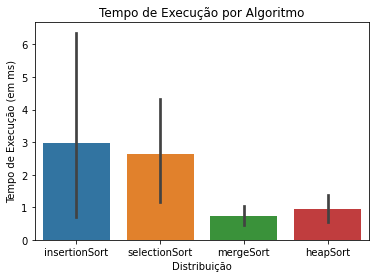

In [34]:
sns.barplot(data=df, y='tempo_execucao_ms', x='algoritmo')
plt.title('Tempo de Execução por Algoritmo')
plt.xlabel('Distribuição')
plt.ylabel('Tempo de Execução (em ms)')
plt.show()

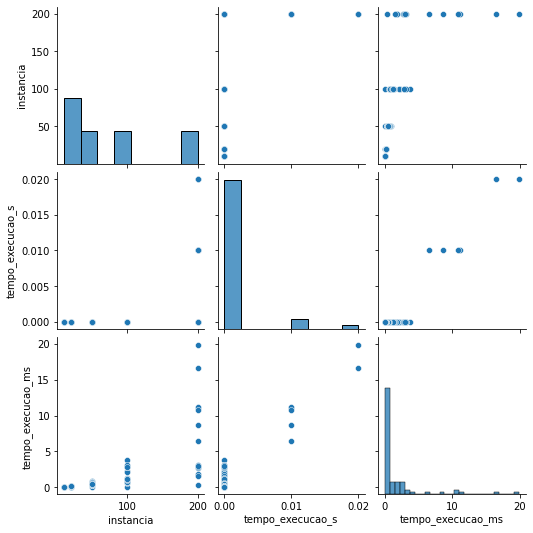

In [18]:
sns.pairplot(data=df)

In [19]:
# Correlação?
df.corr()

,instancia,tempo_execucao_s,tempo_execucao_ms
instancia,1.000000,0.518861,0.661059
tempo_execucao_s,0.518861,1.000000,0.952996
tempo_execucao_ms,0.661059,0.952996,1.000000


<AxesSubplot:xlabel='tempo_execucao_ms', ylabel='algoritmo'>

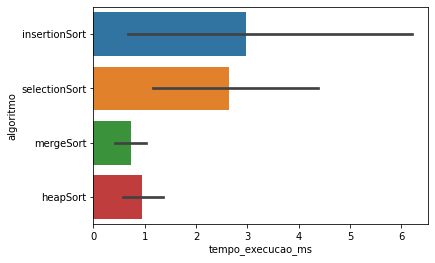

In [35]:
sns.barplot(data=df, y='algoritmo', x='tempo_execucao_ms')

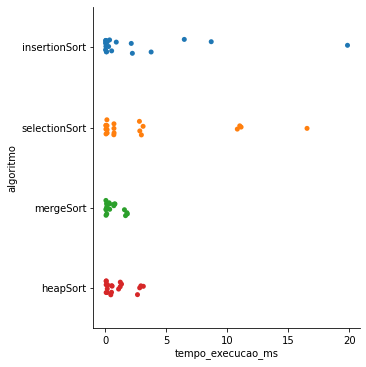

In [36]:
sns.catplot(data=df, y='algoritmo', x='tempo_execucao_ms')

In [36]:
2/2

1.0